<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/M2_2_9_1_Rotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://github.com/james-lucius/qureca_ADEQUATE/blob/qworld/images/header.jpg?raw=1"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Rotations </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>
[<img src="https://github.com/james-lucius/qureca_ADEQUATE/blob/qworld/images/watch_lecture.jpg?raw=1" align="left">](https://youtu.be/bmrQhASbo34)
<br><br><br>

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

if in_colab():
    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum.py"
    !wget --no-cache -O quantum.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/drawing.py"
    !wget --no-cache -O drawing.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum_state.py"
    !wget --no-cache -O quantum_state.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/grover.py"
    !wget --no-cache -O grover.py {url}

    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

--2025-06-09 01:03:48--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2760 (2.7K) [text/plain]
Saving to: ‘quantum.py’

quantum.py          100%[===================>]   2.70K  --.-KB/s    in 0s      

2025-06-09 01:03:49 (42.9 MB/s) - ‘quantum.py’ saved [2760/2760]

--2025-06-09 01:03:49--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/drawing.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6260 (6.1K) [text/plain]
Saving to: ‘drawing.py’

drawing.py          100%[===================>]   6.11K  --.-KB/s    in 0s      

2025-06-09 01:03:49 (64.5 MB/s) - 

_We use certain tools from python library "<b>matplotlib.pyplot</b>" for drawing. Check the notebook [Python: Drawing](../python/Python06_Drawing.ipynb) for the list of these tools._

We start with drawing the quantum states $ \ket{0} $ and $ \ket{+} = \myvector{ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} } $.

<i style="font-size:10pt;">
Our predefined function "draw_qubit()" draws a figure, the origin, the axes, the unit circle, and base quantum states.
<br>
Our predefined function "draw_quantum_state(x,y,name)" draws an arrow from (0,0) to (x,y) and associates it with <u>name</u>.
<br>
We include our predefined functions with the following line of code:
    
    %run quantum.py
</i>   

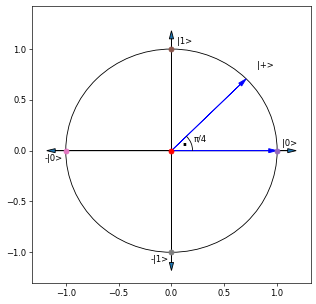

In [2]:
%run quantum.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")

draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=45) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'\u03C0/4')
show_plt()

<h3> Task 1 (discussion) </h3>

Suppose that we start in state $ \ket{0} $, and then obtain state $\ket{+}$ by appling a rotation operator.

If we apply the same operator consecutively, what can be the new quantum state?

Here are eight candidates:

$$
    \myarray{|c|c|c|c|}{
        \hline
        A & \ket{0} = \vzero & E & \ket{+} = \myrvector{\sqrttwo \\ \sqrttwo}
        \\ \hline
        B & \ket{1} = \vone & F & \ket{-} = \myrvector{\sqrttwo \\ -\sqrttwo}
        \\ \hline
        C & -\ket{0} = \myrvector{-1 \\ 0} & G & -\ket{+} = \myrvector{-\sqrttwo \\ -\sqrttwo}
        \\ \hline
        D & -\ket{1} = \myrvector{0 \\ -1} & H & -\ket{-} = \myrvector{-\sqrttwo \\ \sqrttwo}
        \\ \hline
    }
$$

<h3> Rotation with degree $\pi/4$ </h3>

Its matrix form is similar to Hadamard operator:

$$ R(\pi/4) = \mymatrix{rr}{\cos(\pi/4) & -\sin(\pi/4) \\ \sin(\pi/4) & \cos(\pi/4) }
= \mymatrix{rr}{ \sqrttwo & -\sqrttwo \\  \sqrttwo & \sqrttwo} $$.

<h3> Task 2 </h3>

Start with state $ \ket{0} $.

Apply $ R(\pi/4) $ 7 times, and draw each state on the unit circle.

<Figure size 640x480 with 0 Axes>

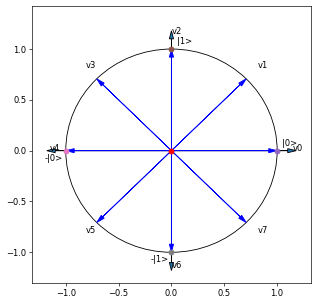

In [6]:
%run quantum.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

sqrttwo = 2**0.5
oversqrttwo = 1/sqrttwo

R = [ [oversqrttwo, -1*oversqrttwo], [oversqrttwo,oversqrttwo] ]

#
# your code is here
#
#
for i in range(7):
  new_x = R[0][0]*x + R[0][1]*y
  new_y = R[1][0]*x + R[1][1]*y
  x, y = new_x, new_y
  draw_quantum_state(x, y, "v" + str(i + 1))
show_plt()

<a href="Q44_Rotations_Solutions.ipynb#task2">click for our solution</a>

<h3>Reading the quantum state of a circuit</h3>

The backend "StatevectorSimulator" of Qiskit reads the quantum state of the circuit at that point. It is a classical simulator, and, if any measurement operator is defined, it implements this measurement operator and continues by following one of the possible outcomes.

We can read the current state of a circuit as follows:

    from qiskit_aer import StatevectorSimulator
    job = StatevectorSimulator().run(quantum_circuit)
    current_quantum_state = job.result().get_statevector(quantum_circuit).data

"current_quantum_state" is the list of amplitudes, which are complex numbers. For example, the real part of the amplitude of the first state is printed as follows:

    print(current_quantum_state[0].real)

<h3> Task 3 </h3>

We implement Task 2 by using "ry-gate" and "statevector_simulator".

Define a quantum circuit with one qubit.

Iterate seven times
- Apply the rotation with angle $ \pi \over 4 $ by using ry-gate
- Read the current quantum state
- Print the current quantum state
- Draw the quantum state on the unit circle by using the values of the current quantum state

[0.70710678+0.j 0.70710678+0.j]
[2.22044605e-16+0.j 1.00000000e+00+0.j]
[-0.70710678+0.j  0.70710678+0.j]
[-1.00000000e+00+0.j  2.77555756e-16+0.j]
[-0.70710678+0.j -0.70710678+0.j]
[-4.4408921e-16+0.j -1.0000000e+00+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


<Figure size 640x480 with 0 Axes>

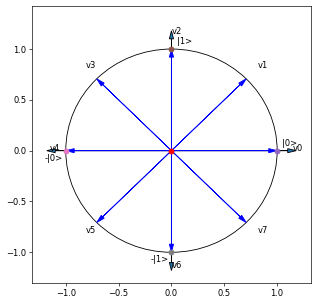

In [10]:
%run quantum.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

#
# your code is here
#
#
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import StatevectorSimulator
from math import pi

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

for i in range(7):
  qc.ry(2 * pi / 4, q[0])
  job = StatevectorSimulator().run(qc)
  current_quantum_state = job.result().get_statevector(qc).data
  print(current_quantum_state)
  x = current_quantum_state[0].real
  y = current_quantum_state[1].real
  draw_quantum_state(x, y, "v" + str(i + 1))
show_plt()

<a href="Q44_Rotations_Solutions.ipynb#task3">click for our solution</a>

<h3> Rotation with degree $\theta$ </h3>

The matrix form of a rotation is as follows:

$$ R(\theta) = \mymatrix{rr}{\cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) }, $$

where $ \theta $ is the angle of rotation (in counter-clockwise direction).

<h3> Task 4 </h3>

Repeat Task 3 for the angle $ \pi/6 $ by applying the rotation 12 times.

Repeat Task 3 for the angle $ 3\pi/8 $ by applying the rotation 16 times.

Repeat Task 3 for the angle $ \sqrt{2}\pi $ by applying the rotation 20 times.

In [ ]:
#
# your code is here
#
%run quantum.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import StatevectorSimulator
from math import pi

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

angles = []

for i in range(7):
  qc.ry(2 * pi / 4, q[0])
  job = StatevectorSimulator().run(qc)
  current_quantum_state = job.result().get_statevector(qc).data
  print(current_quantum_state)
  x = current_quantum_state[0].real
  y = current_quantum_state[1].real
  draw_quantum_state(x, y, "v" + str(i + 1))
show_plt()

<a href="Q44_Rotations_Solutions.ipynb#task4">click for our solution</a>

<h3> Task 5 (discussion) </h3>

Let us define a rotation angle as $ \theta_\alpha = \alpha \cdot (2\pi) $.

When starting in state $ \ket{0} $ and applying the rotation with angle $ \theta_\alpha $ arbitrarily many times, the state $ \ket{0} $ can be visited again or not?
- For which values of $\alpha$ will the state $\ket{0}$ be visited?
- For which values of $\alpha$ will the state $\ket{0}$  never be visited?

<h3> Task 6 </h3>

We randomly pick an angle $ \theta \in [0,2\pi) $.

We have two separate qubits initially set to state $ \ket{0} $.

The first qubit is rotated by the angle $ \theta $ and the second qubit is rotated by the angle $ \theta + \pi/2 $.

Implement each qubit and its rotation as a separate quantum circuit.

Then, read both quantum states and calculate their dot product.

Check the result of the dot product for different random angles.

In [ ]:
#
# your code is here
#


<a href="Q44_Rotations_Solutions.ipynb#task6">click for our solution</a>

<h3> Task 7 </h3>

We randomly pick an angle $ \theta \in [0,2\pi) $.

We have a single qubit initially set to state $ \ket{0} $.

The qubit is rotated by the angle either $ \theta_1 =  \theta $ or $ \theta_2 =  \theta-\pi/2 $.

You are allowed to do one more rotation $ \theta' $ and then make a measurement.

Can you determine the angle of the first rotation angle by looking/using the measurement result? Is it $ \theta_1 $ or $ \theta_2 $?

Check your solution for different random angles.

In [ ]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

random_angle = randrange(3600)/10
rotation_angle1 = random_angle/360*2*pi
rotation_angle2 = rotation_angle1 - pi/2

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

if randrange(2)==0:
    qc.ry(2 * rotation_angle1,q[0])
    picked_angle = "theta1"
else:
    qc.ry(2 * rotation_angle2,q[0])
    picked_angle = "theta2"

#
# your code is here
#
your_guess = ""




######################
print("your guess is",your_guess)
print("picked_angle is",picked_angle)

<a href="Q44_Rotations_Solutions.ipynb#task7">click for our solution</a>